In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../mnist_record_stats_new.csv')

In [3]:
def plot_heatmap0(df):
    cols = filter(lambda x: "norm" in x or "var" in x, df.columns)
    df = df[cols]

    df = df.T
    plt.figure(figsize=(150, 40))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap0(df)



NameError: name 'sns' is not defined

<Figure size 15000x4000 with 0 Axes>

In [4]:
df = df.iloc[[0, 15, 30, 45, 60, 75], :]

In [5]:
df

,Unnamed: 0,l1_grad_norm,l1_weight_spectral_norm,l1_x_spectral_norm,l1_x_grad_spectral_norm,l1_grad_out_spectral_norm,l1_x_var,l1_x_grad_var,l1_grad_out_var,l1_l1_xp,...,l5_l4_wbp,l5_l4_xbp,l5_l5_xp,l5_l5_wp,l5_l5_go1p,l5_l5_go2p,l5_l5_wbp,l5_l5_xbp,loss,acc
0,0,0.849471,1.275686,127.213310,0.007025,0.007758,0.955245,8.709600e-09,7.795103e-08,0.667331,...,0.0,0.0,0.449770,1.348069,0.0,0.625020,0.0,0.564246,0.103771,0.156250
15,15,0.728644,1.275441,134.410080,0.007919,0.008482,1.023209,8.561300e-09,7.657431e-08,1.753093,...,0.0,0.0,0.324649,0.720616,0.0,0.259009,0.0,0.546448,0.074441,0.484375
30,30,0.700227,1.275415,130.184891,0.008899,0.009132,1.016691,9.258582e-09,7.946176e-08,8.817320,...,0.0,0.0,3.655740,12.504269,0.0,2.246198,0.0,1.494751,0.055906,0.640625
45,45,0.757323,1.275223,134.881439,0.010368,0.010768,1.061946,1.198236e-08,1.035583e-07,9.060638,...,0.0,0.0,9.949280,27.149017,0.0,4.001936,0.0,2.380978,0.051278,0.703125
60,60,0.729924,1.274903,128.900192,0.010072,0.010210,1.019489,1.293027e-08,1.092214e-07,0.857880,...,0.0,0.0,1.948755,3.704838,0.0,0.453198,0.0,0.734235,0.044197,0.796875
75,75,0.752629,1.274888,127.242744,0.010360,0.010761,0.970442,1.256623e-08,1.059732e-07,3.926054,...,0.0,0.0,3.296055,7.683758,0.0,0.905797,0.0,0.765546,0.035270,0.828125


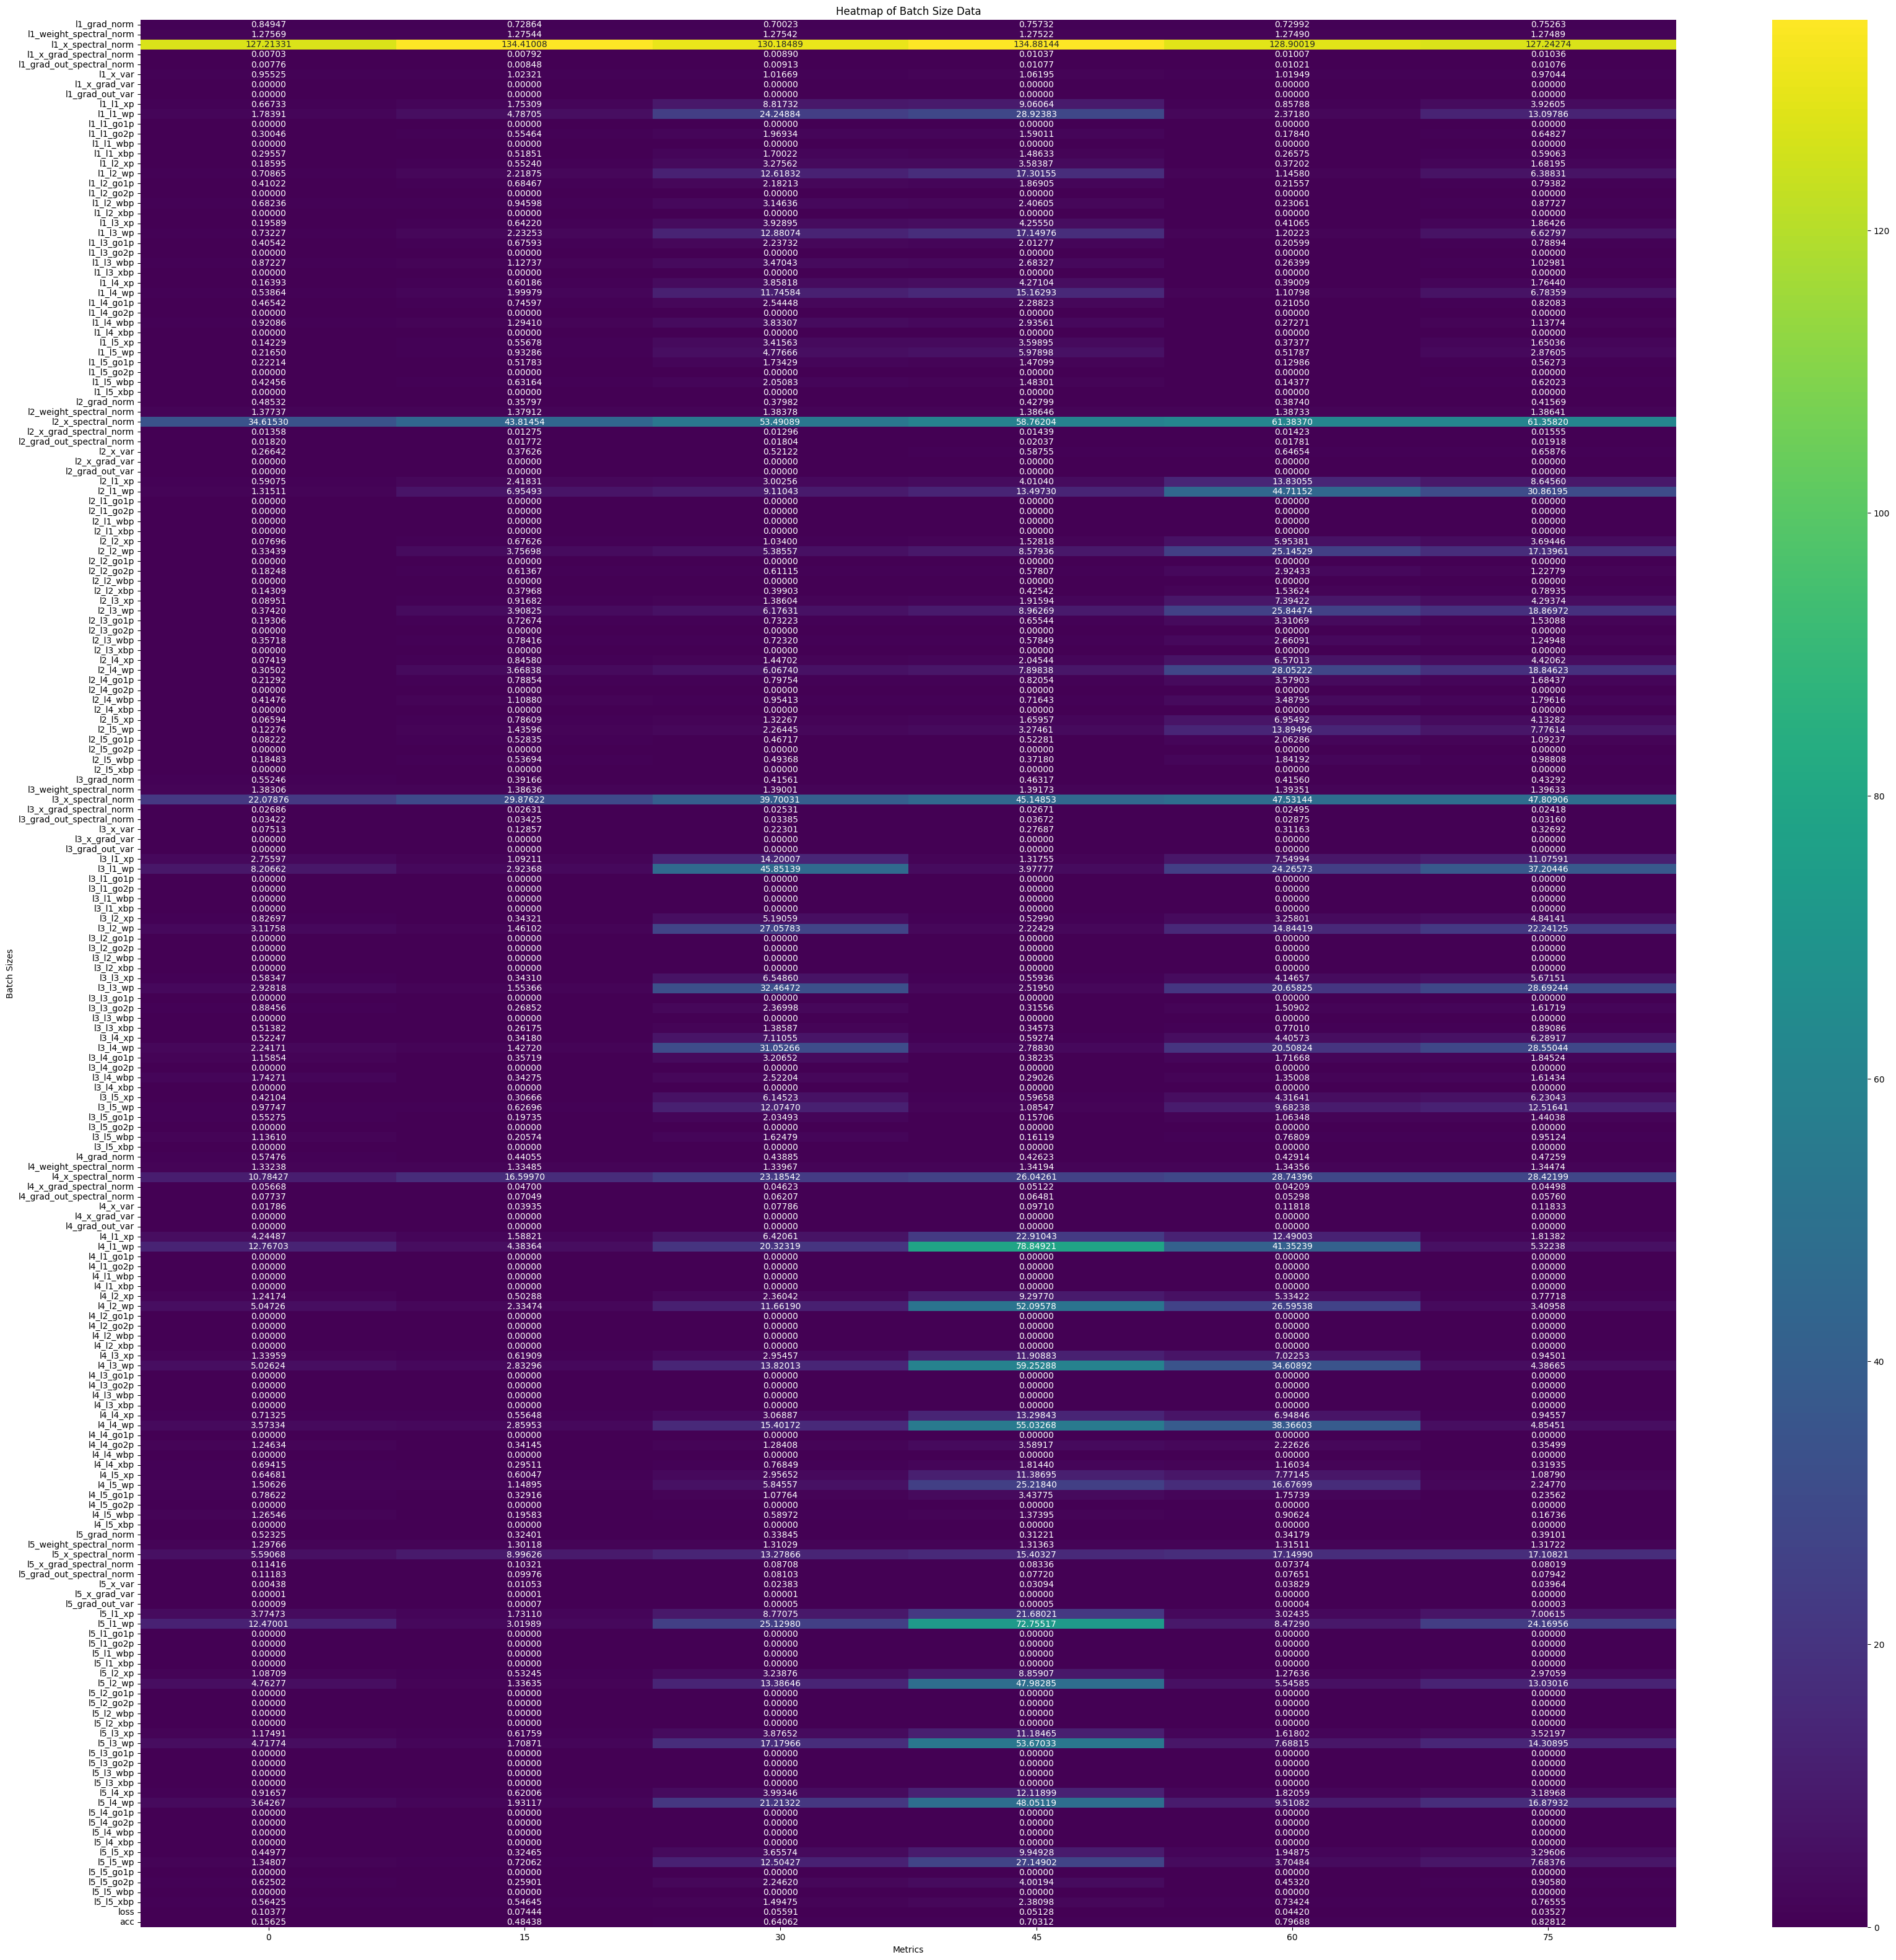

In [6]:
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    data = data.drop(columns=['Unnamed: 0'])
    df = pd.DataFrame(data).T

    # Create the heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".5f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap(df)


In [7]:
print(df.iloc[0, :])

Unnamed: 0                   0.000000
l1_grad_norm                 0.849471
l1_weight_spectral_norm      1.275686
l1_x_spectral_norm         127.213310
l1_x_grad_spectral_norm      0.007025
                              ...    
l5_l5_go2p                   0.625020
l5_l5_wbp                    0.000000
l5_l5_xbp                    0.564246
loss                         0.103771
acc                          0.156250
Name: 0, Length: 193, dtype: float64


In [14]:
ls = [1, 2, 3, 4, 5]

layer_mat = {}
t = 3

this_time_step = df.iloc[t, :]

# Iterate over each column in the DataFrame
for col in this_time_step.keys():
    # Check if the column name contains 'l'
    lpart = col.split('_')[0]  # e.g., 'bs512'
    tail = '_'.join(col.split('_')[1:])  # e.g., 'f2_b2_rnearest_False_bias'
    
    # Ensure the batch size is one of the considered sizes
    for l in ls:
        if f'l{l}' in lpart:
            # Initialize list for this batch size if not already done
            if l not in layer_mat:
                layer_mat[l] = {}
            
            # Append the value to the list for this batch size
            layer_mat[l][tail] = this_time_step[col]

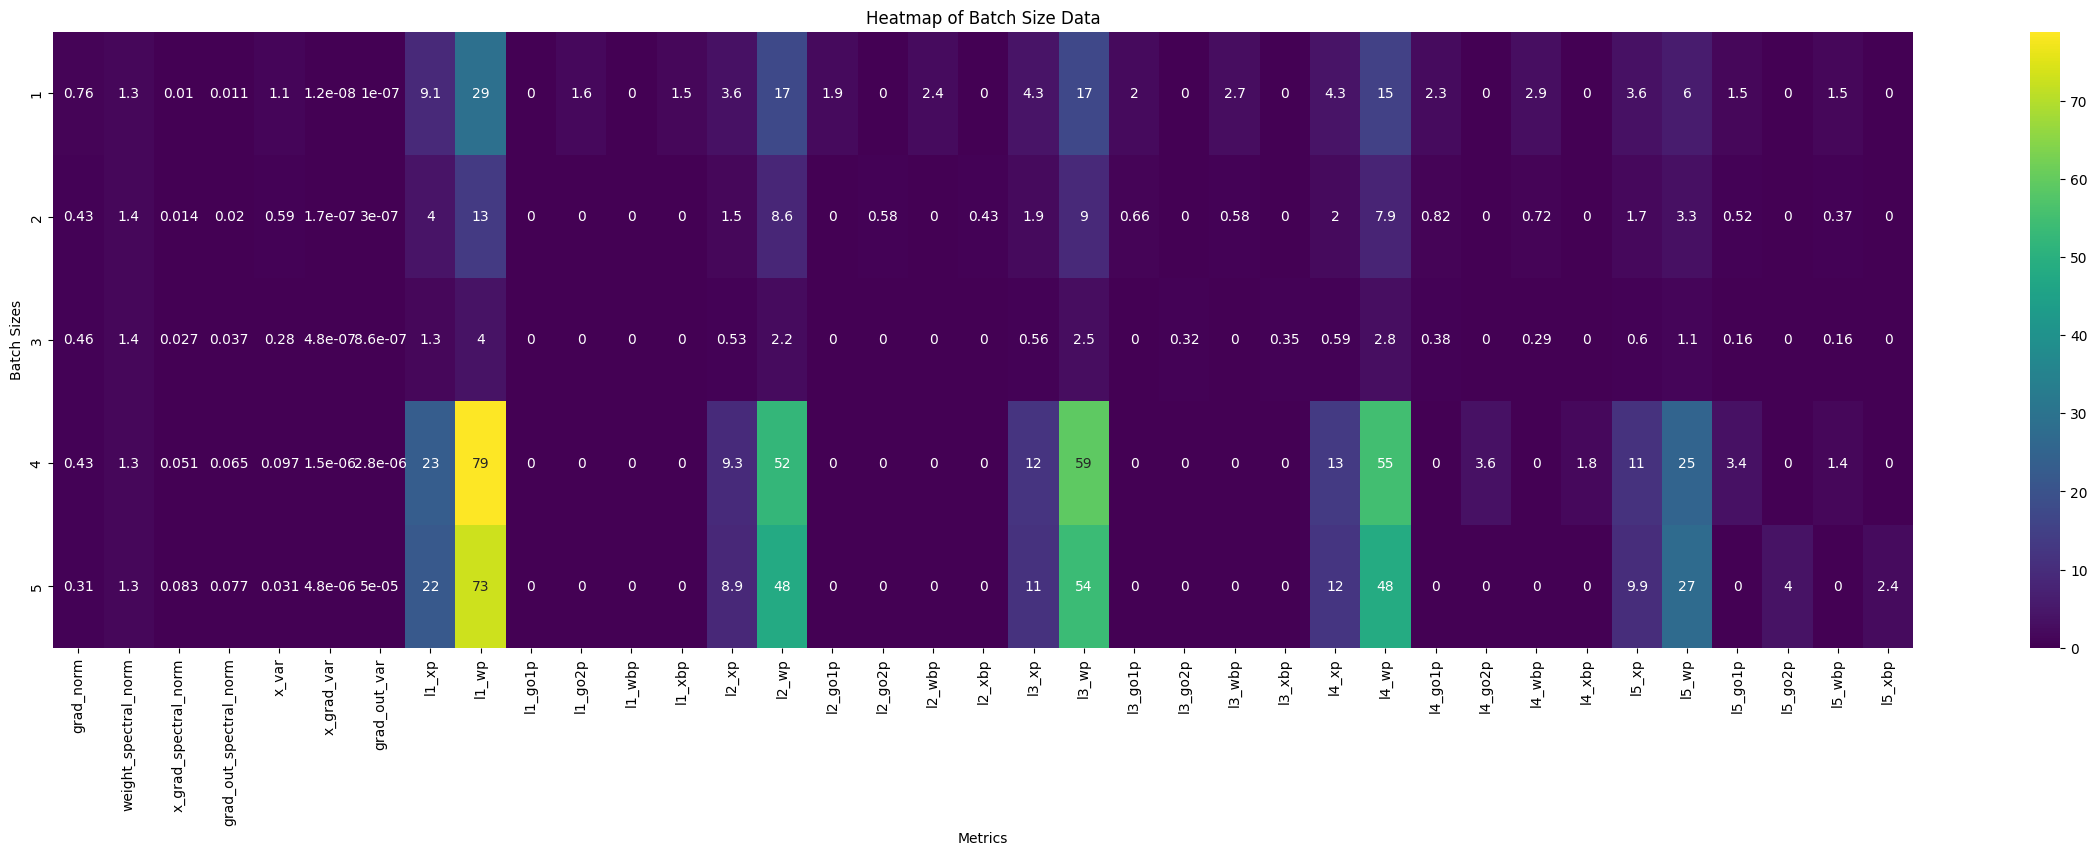

In [15]:
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data).T
    df = df.drop(columns=['x_spectral_norm'])

    # Create the heatmap
    plt.figure(figsize=(30, 8))
    sns.heatmap(df, annot=True, cmap='viridis')
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap(layer_mat)

In [ ]:
import math
df.apply(lambda x: math.exp(x))

In [ ]:
(\partial L / \partial w) / \partial error